<a href="https://colab.research.google.com/github/sheikanees/Shakespearean-Text-Generation/blob/master/Shakespearean_Text_Generation_using_LSTM_%26_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shakespearean Text Generation using LSTM & Embedding**

**Importing Necessary Libraries**

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

**Loading the Shakespearean Dataset** 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1  

--2019-10-20 04:16:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-10-20 04:16:26 (102 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



**Processing the Dataset**

In [0]:
# creating input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

Each sentence in corpus is tokenized into a list of tokens i.e token_list

For each tokenized sentence (token_list), e.g "This apple is very crunchy", the input sequences are: \
1) This apple \
2) This apple is \
3) This apply is very 

In [0]:
# padding sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# creating predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Each input_sequence is split into predictors & label.  Predictors are basically the input_sequence minus the last word and the corresponding label is the last word of the input_sentence.  The label array is converted to one-hot representation so that it can be fed into a softmax layer to make predictions.

**Building the Model**

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (N

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 6.8992 - acc: 0.0234
Epoch 2/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.5011 - acc: 0.0210
Epoch 3/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.3827 - acc: 0.0275
Epoch 4/100
15462/15462 [==============================] - 31s 2ms/sample - loss: 6.2592 - acc: 0.0303
Epoch 5/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.1674 - acc: 0.0365
Epoch 6/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.0832 - acc: 0.0375
Epoch 7/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 5.9897 - acc: 0.0429
Epoch 8/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 5.8875 - acc: 0.0469
Epoch 9/100
15462/15462 [==============================] - 

**Analyzing Performance of Model**

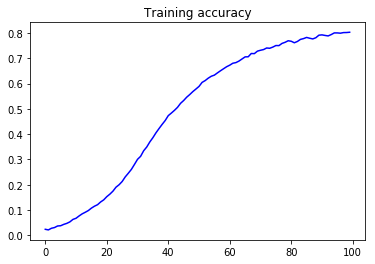

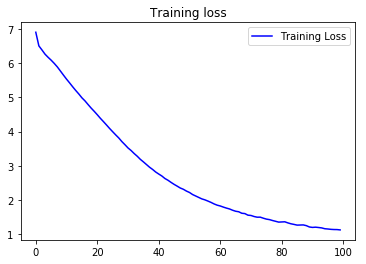

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

**Inputting a Sentence and Predicting the next 100 words**

In [16]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope doth give too deceived clearer torn light wind cold light torn grow ' grow ' arising grow on new blest can mend a waste away away the ground esteem esteem esteem grow exchanged arising arising delighted hate days tell thee on weeds near near slain near slain near latch twain forsaken grow doth grow fall exchanged ' grow up seen back doth latch grow behind weeds care did forth weeds hate remain prove so bold must thee grow wind torn torn deem'd grow sun torn esteem speak up with day or disdain care sun cheeks rage must lose mad live
